In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


In [ ]:

# Load the Iris dataset
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)


In [ ]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:

# Standardize the features for better performance in K-means
scaler = StandardScaler()
iris_scaled = scaler.fit_transform(iris_df)


In [ ]:

# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
iris_df['cluster'] = kmeans.fit_predict(iris_scaled)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:

# Visualize the results using PCA (2D projection)
pca = PCA(n_components=2)
iris_pca = pca.fit_transform(iris_scaled)


In [ ]:
# Standardize the features for better performance in K-means
scaler = StandardScaler()
iris_scaled = scaler.fit_transform(iris)


In [ ]:

# Create a DataFrame with the PCA results and cluster assignments
pca_df = pd.DataFrame(data=iris_pca, columns=['PC1', 'PC2'])
pca_df['cluster'] = iris_df['cluster']





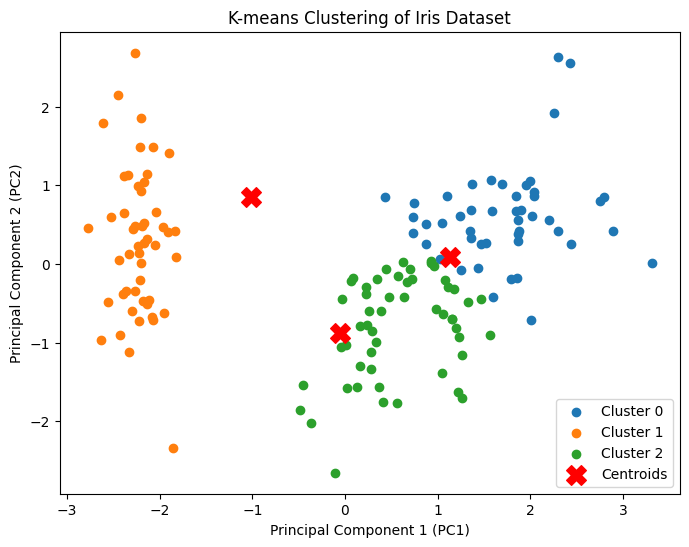

In [ ]:

# Plot the clusters
plt.figure(figsize=(8, 6))
for cluster in range(3):
    cluster_data = pca_df[pca_df['cluster'] == cluster]
    plt.scatter(cluster_data['PC1'], cluster_data['PC2'], label=f'Cluster {cluster}')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X', label='Centroids')
plt.title('K-means Clustering of Iris Dataset')
plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')
plt.legend()
plt.show()
